In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 


In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df["price"].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

In [7]:
# are there any missing value
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

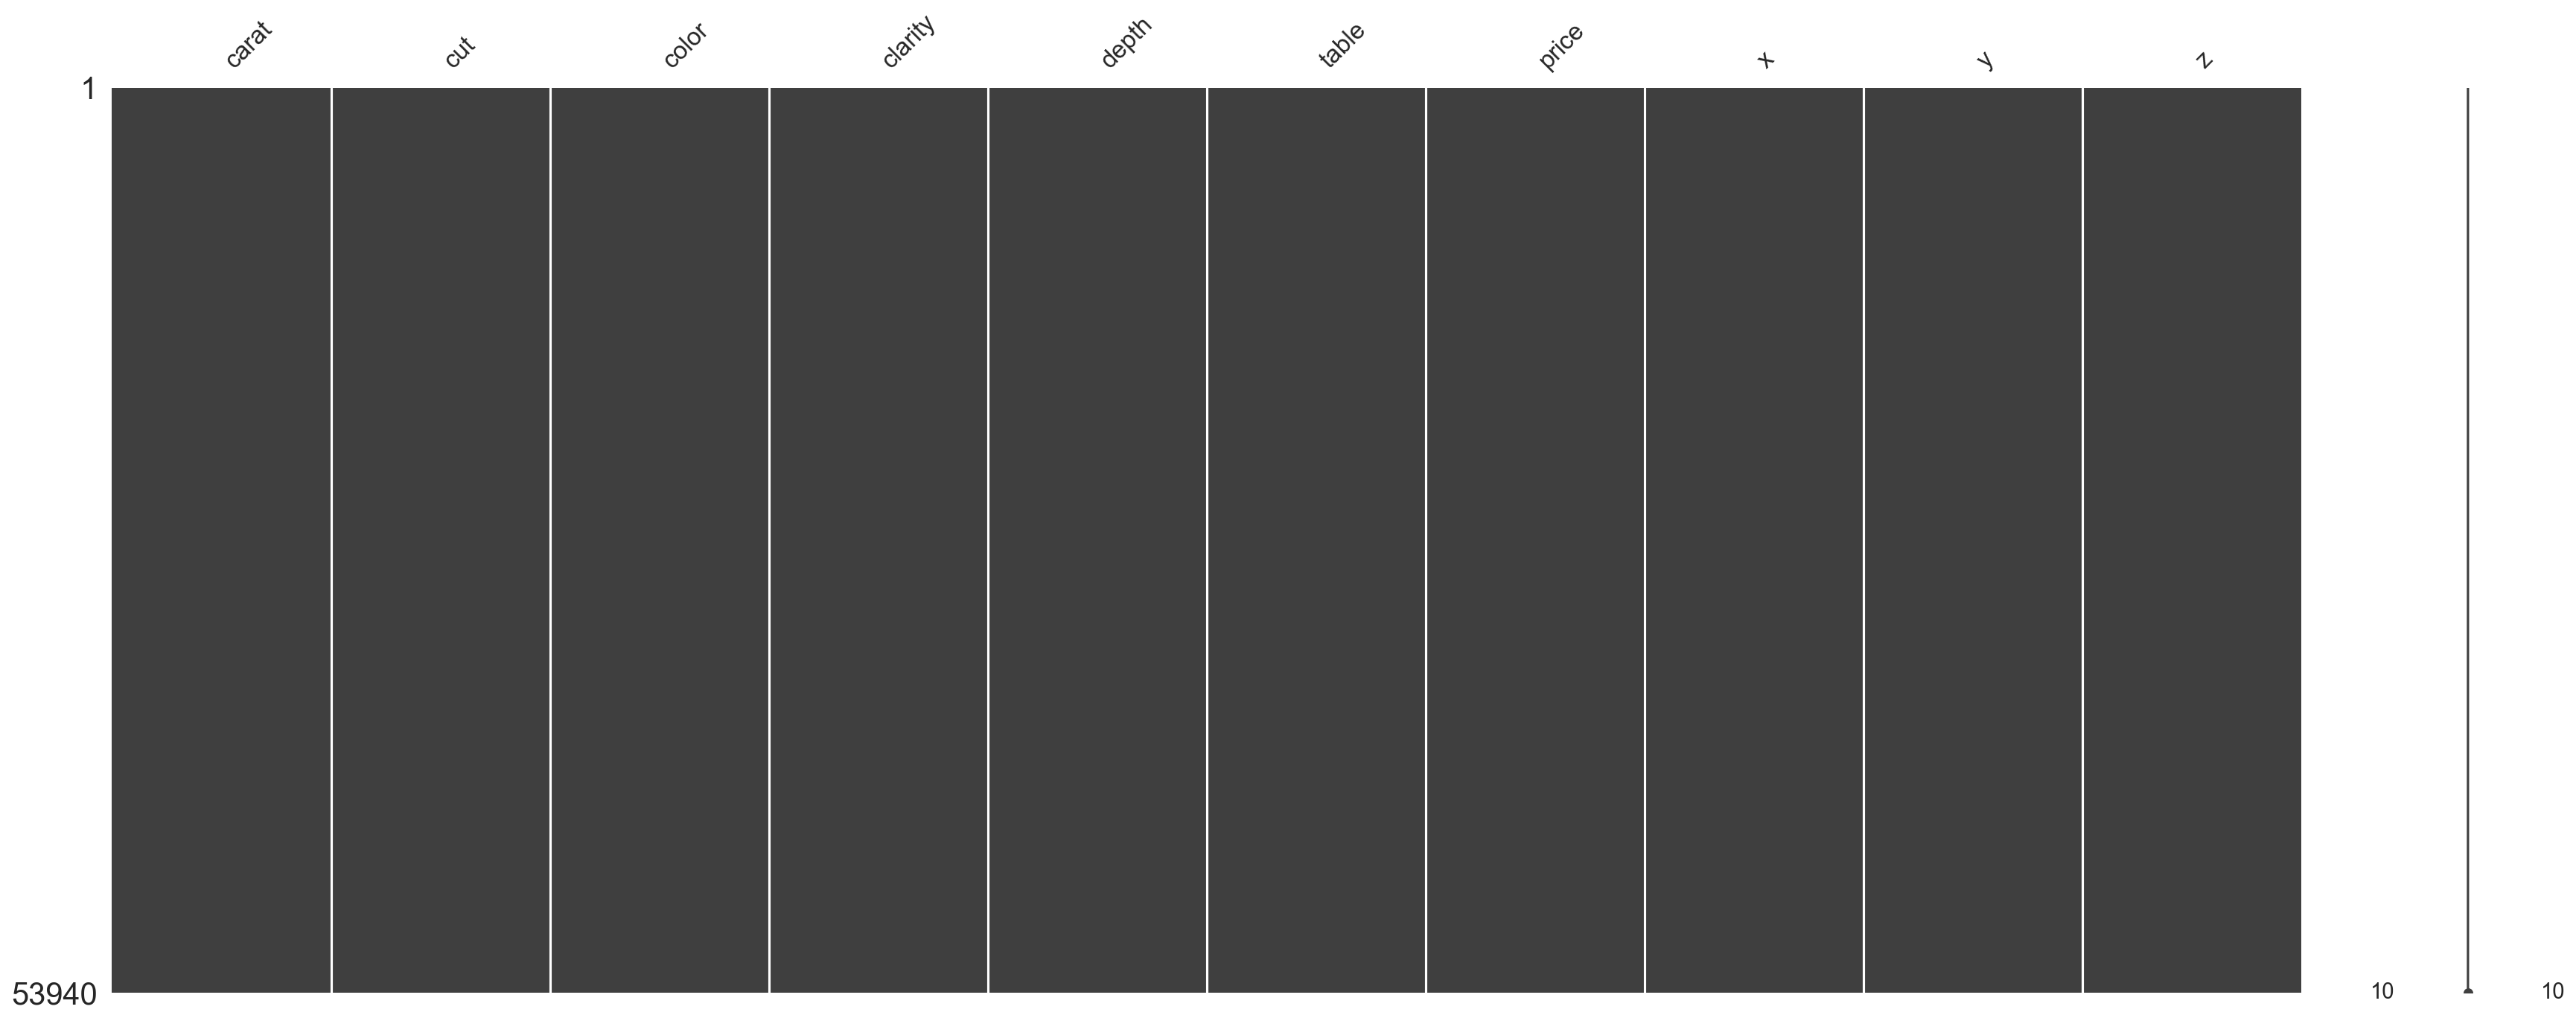

In [10]:
msno.matrix(df) # just to visualize. no missing values.

Do you see the Min. Values of X, Y and Z. It can't be possible..!!
It doesn't make any sense to have either of Length or Width or Height to be zero..

In [11]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [12]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

## We can see there are 20 rows with Dimensions 'Zero'.
* We'll Drop them as it seems better choice instead of filling them with any of Mean or Median

### 1.6) Dropping Rows with Dimensions 'Zero'.

In [13]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [14]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


### 1.7) Scaling of all Features

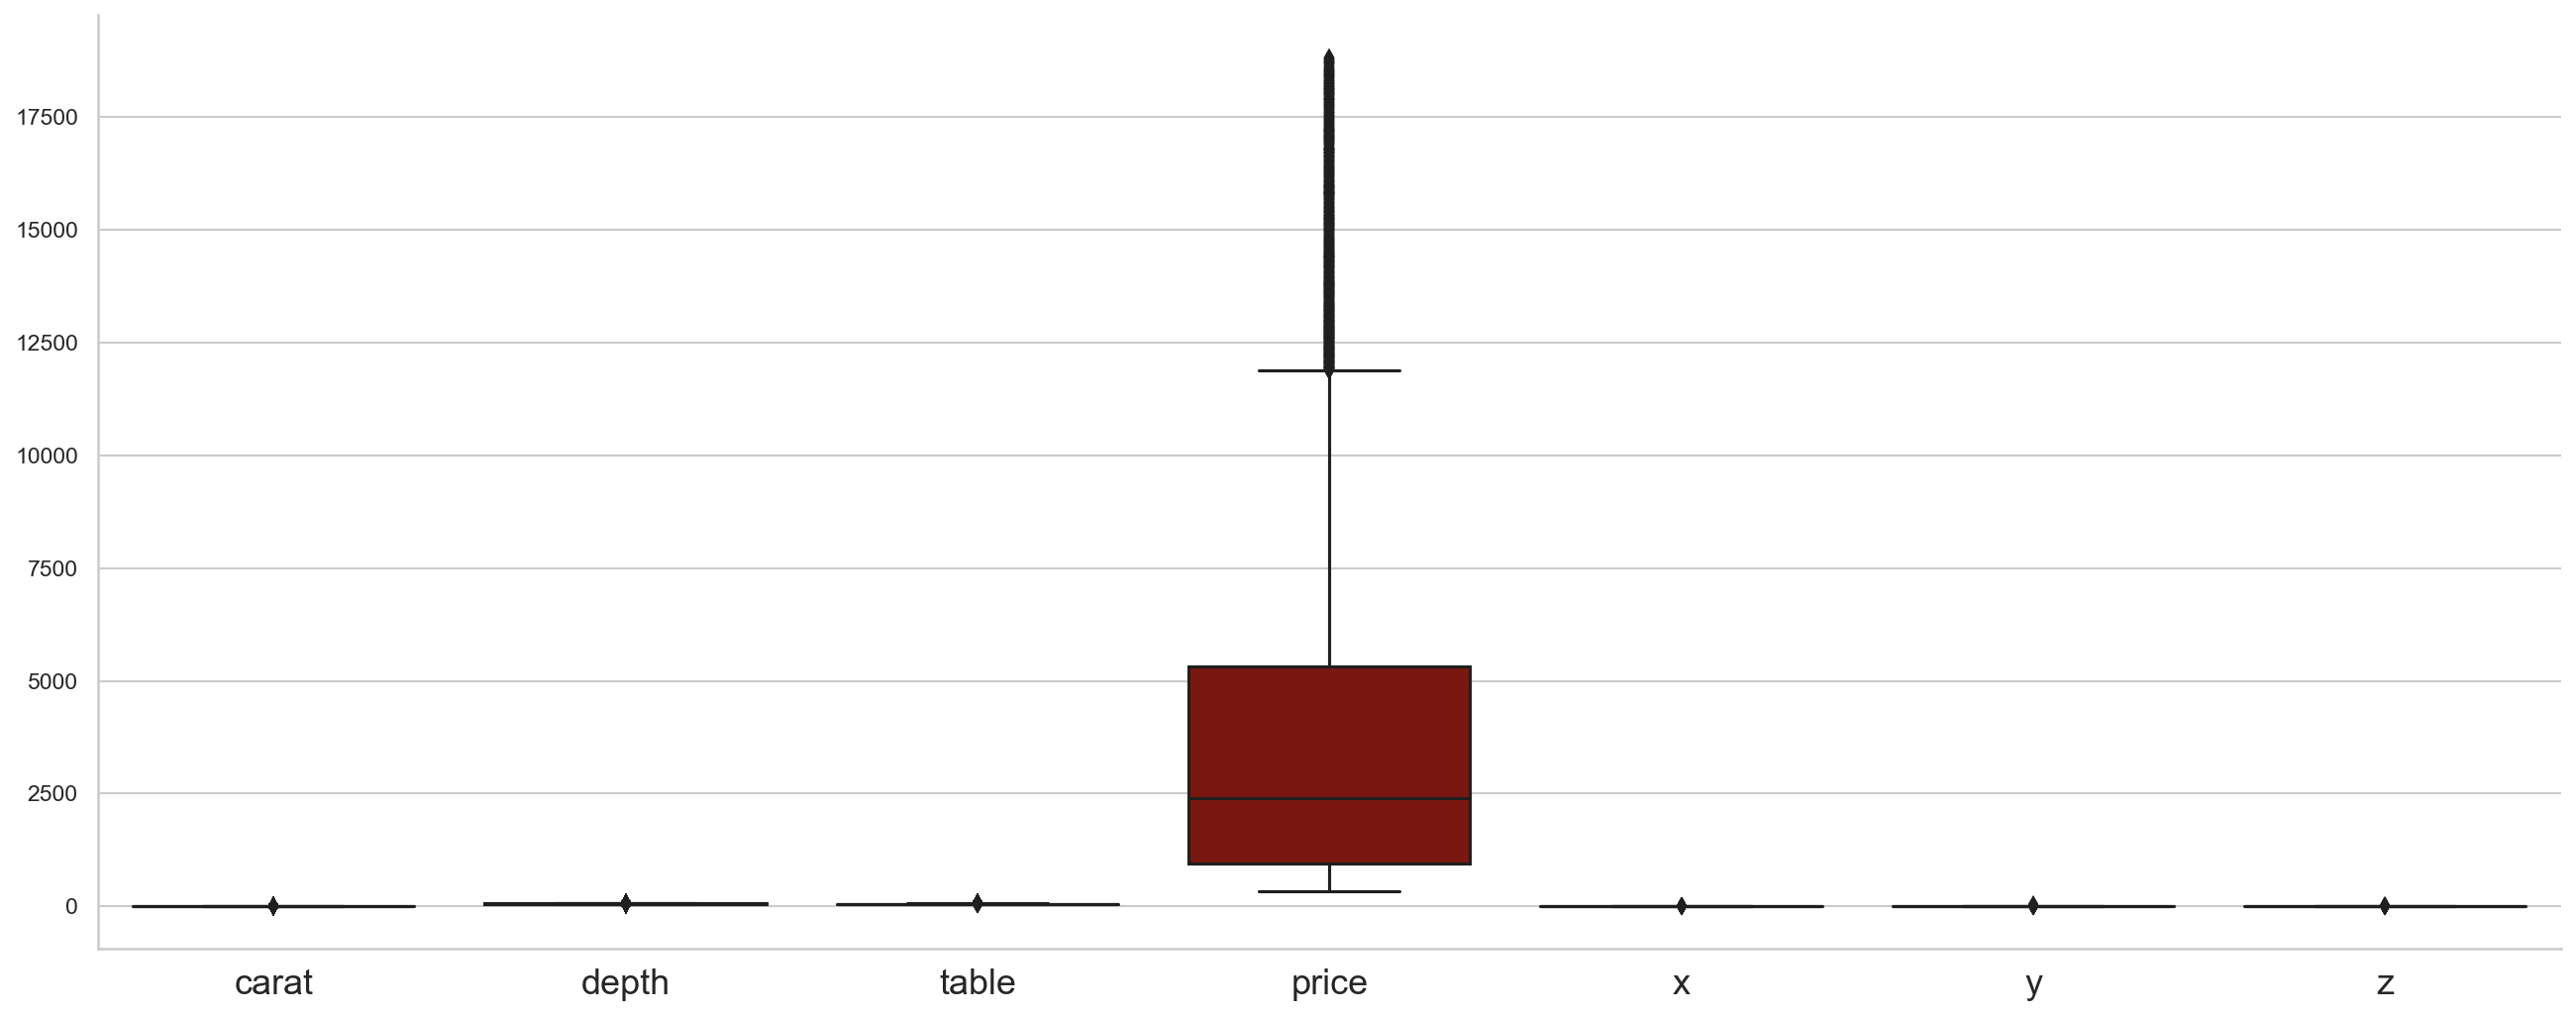

In [15]:
sns.factorplot(data=df , kind='box' , size=7, aspect=2.5)

### The Values are Distributed over a Small Scale.

In [16]:
# Just to Confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


# 2) Correlation Between Features

<Figure size 3000x3000 with 0 Axes>

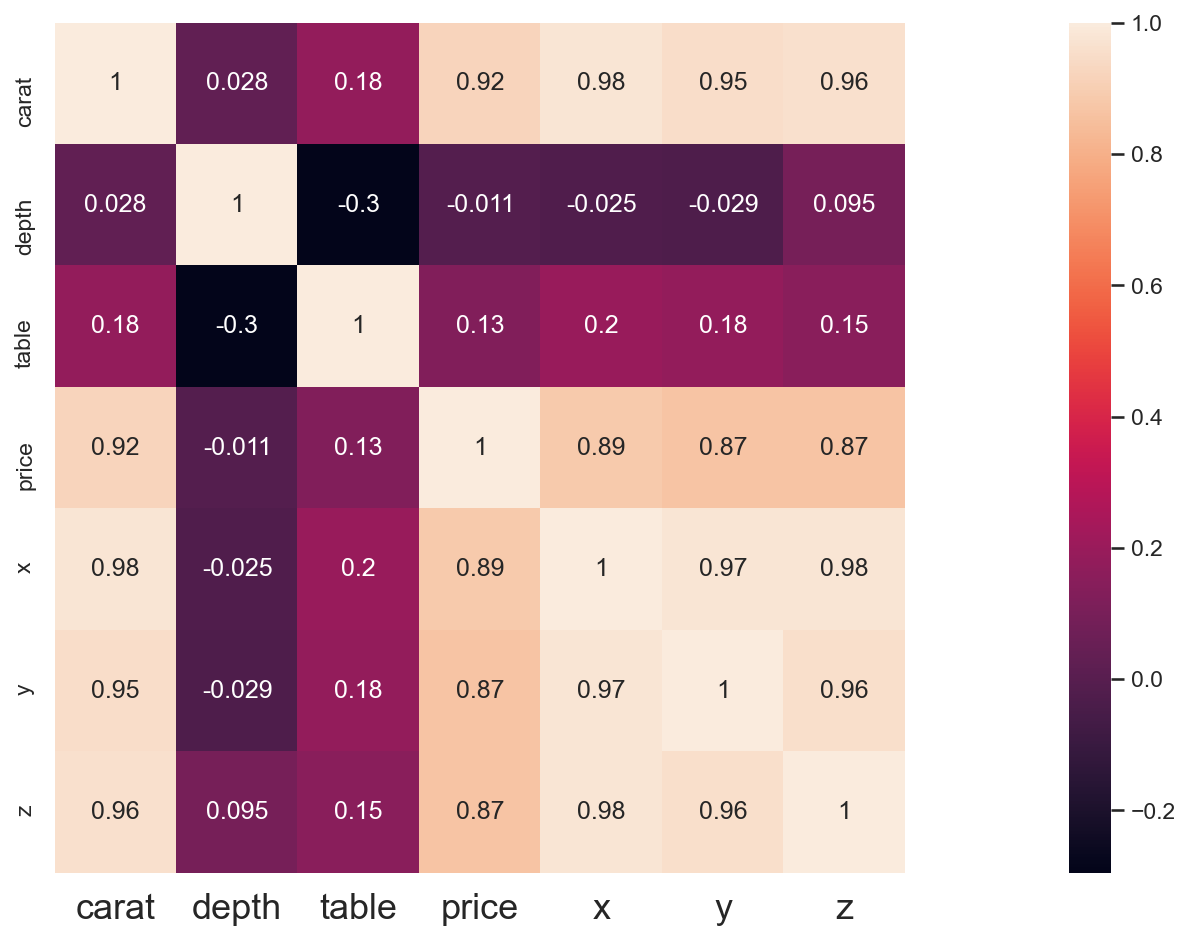

<Figure size 3000x3000 with 0 Axes>

In [17]:
# Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.figure(figsize=(20,20))

## CONCLUSIONS :
#### 1. Depth is inversely related to Price.

* This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

#### 2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

#### 3. The Weight (Carat) of a diamond has the most significant impact on its Price.

* Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.

#### 4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

#### 5. Self Relation ie. of a feature to itself is 1 as expected.

#### 6. Some other Inferences can also be drawn.

### 3. Visualization Of All Features
#### 3.1) Carat
*  Carat refers to the Weight of the Stone, not the Size.
* The Weight of a Diamond has the most significant Impact on its Price.
* Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.
* The carat of a Diamond is often very Important to People when shopping But * it is a Mistake to Sacrifice too much quality for sheer size.

# Visualize via kde plots

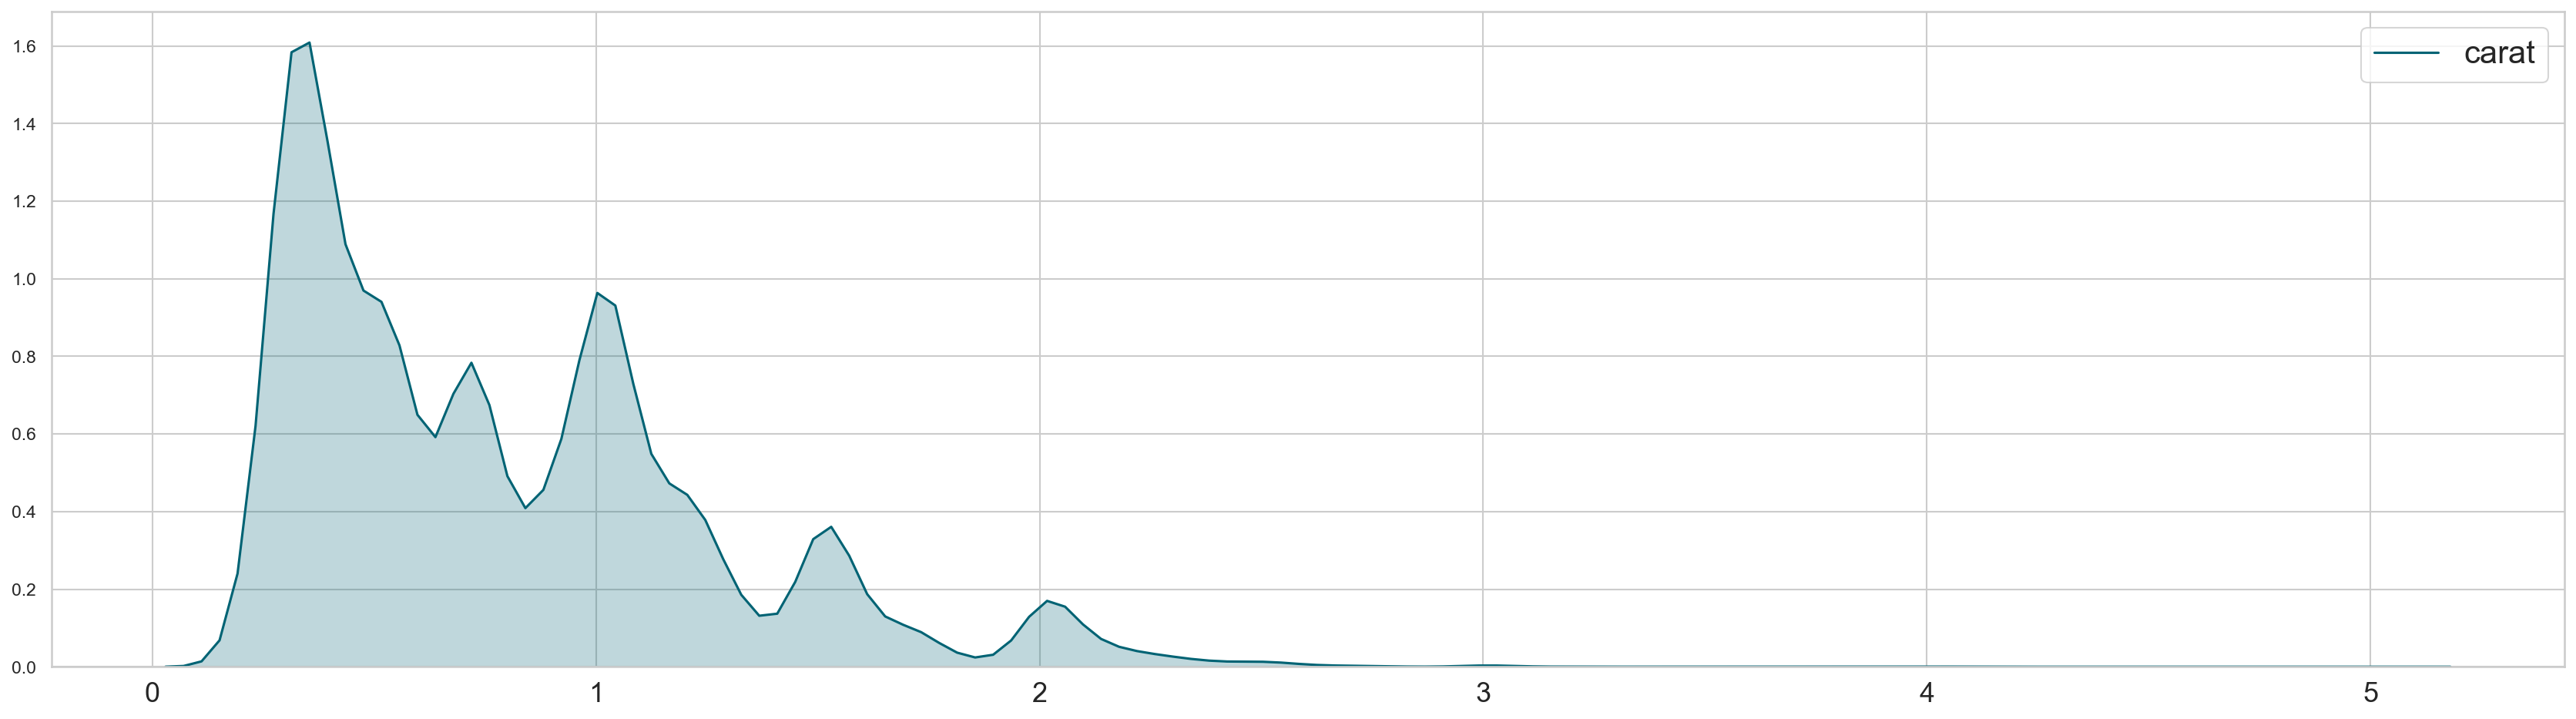

In [18]:
sns.kdeplot(df['carat'], shade=True , color='c')

## Carat vs Price

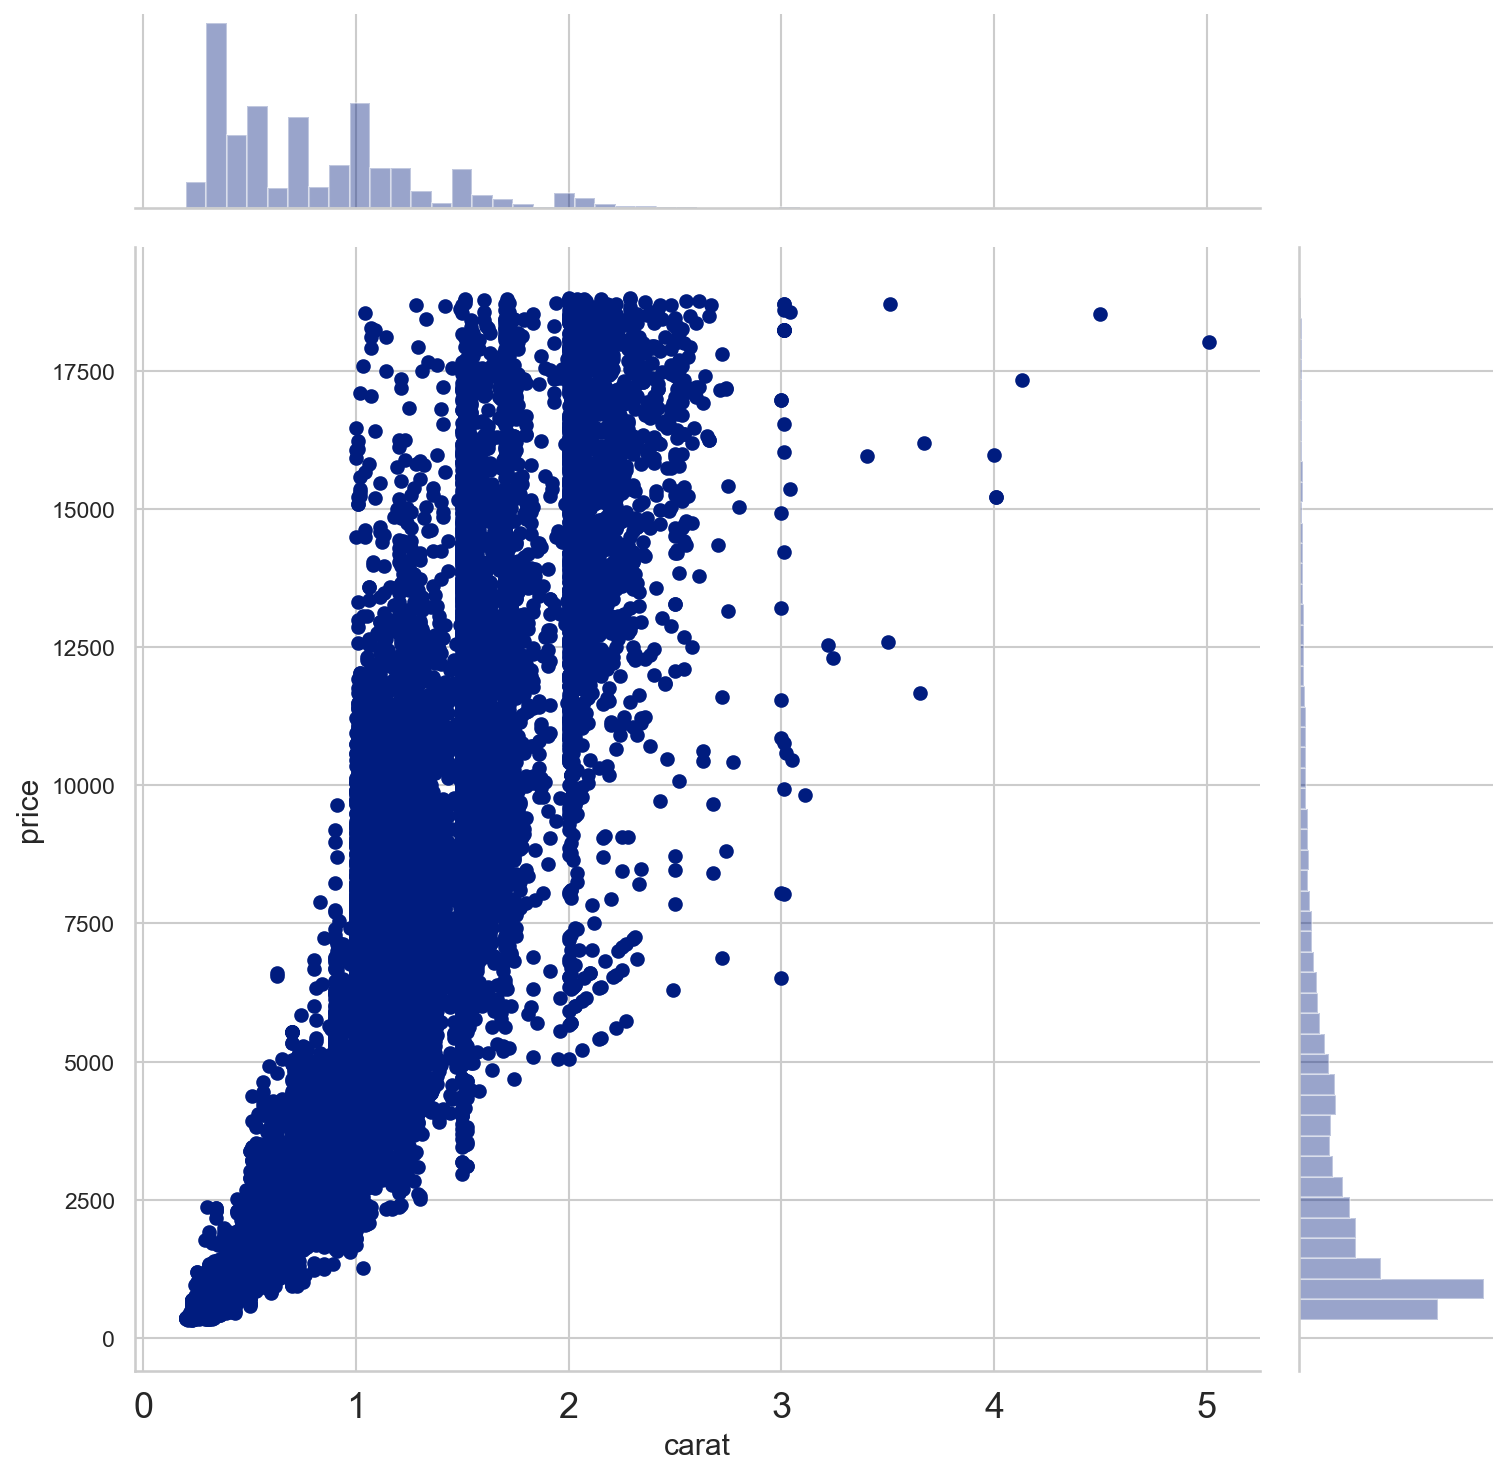

In [19]:
sns.jointplot(x='carat' , y='price' , data=df , size=10)

##### Carat varies with Price Exponentially.

### 3.2) Cut
* Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.
* With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.
* This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.

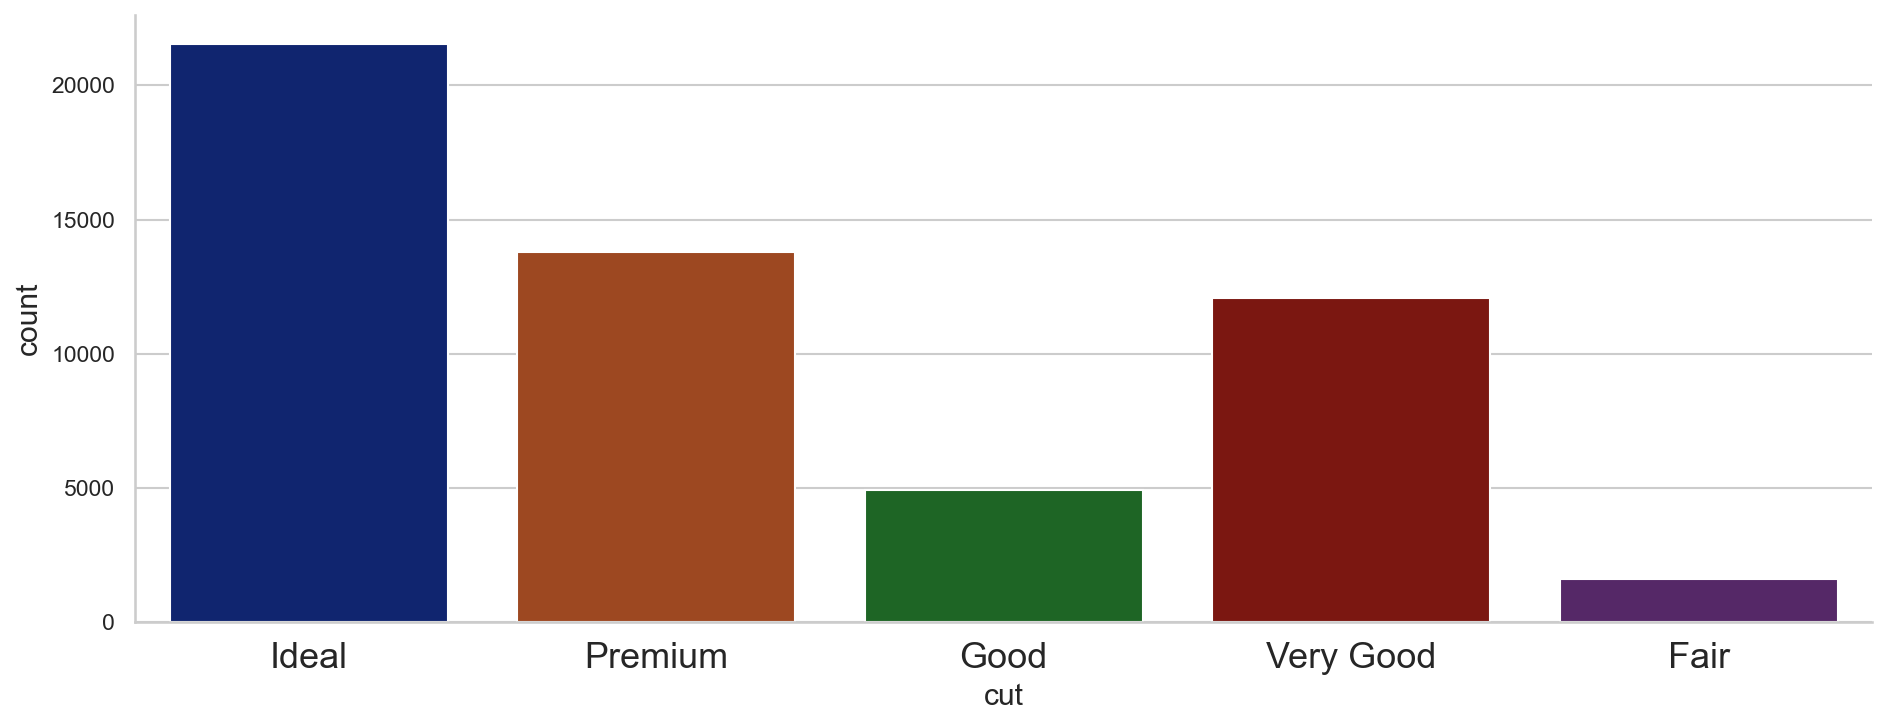

In [20]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 );

### Cut vs Price

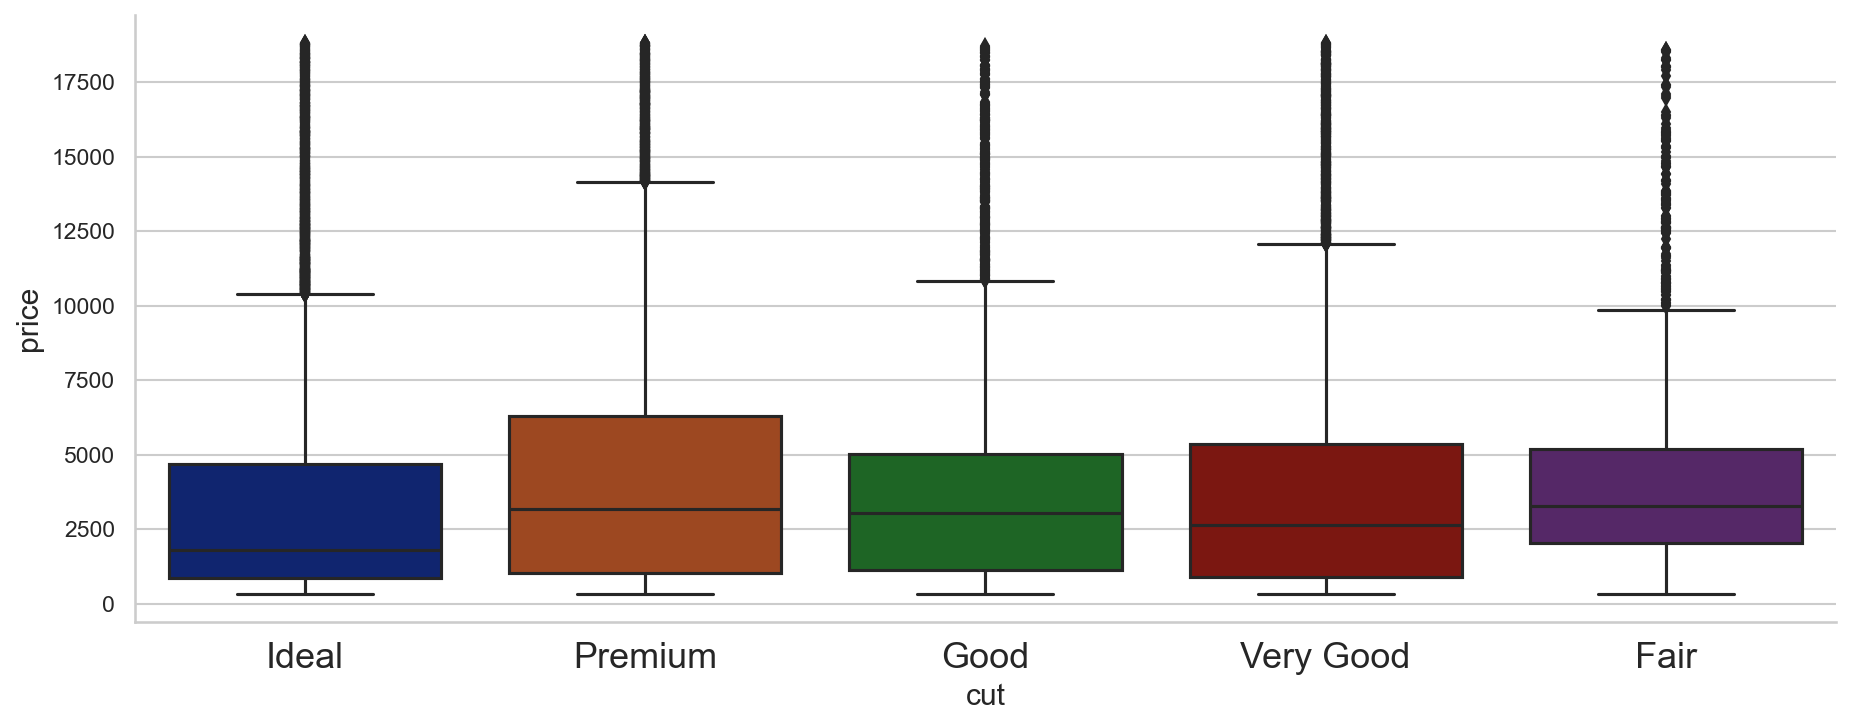

In [21]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

### 3.3) Color
* The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.
* The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.
* Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.

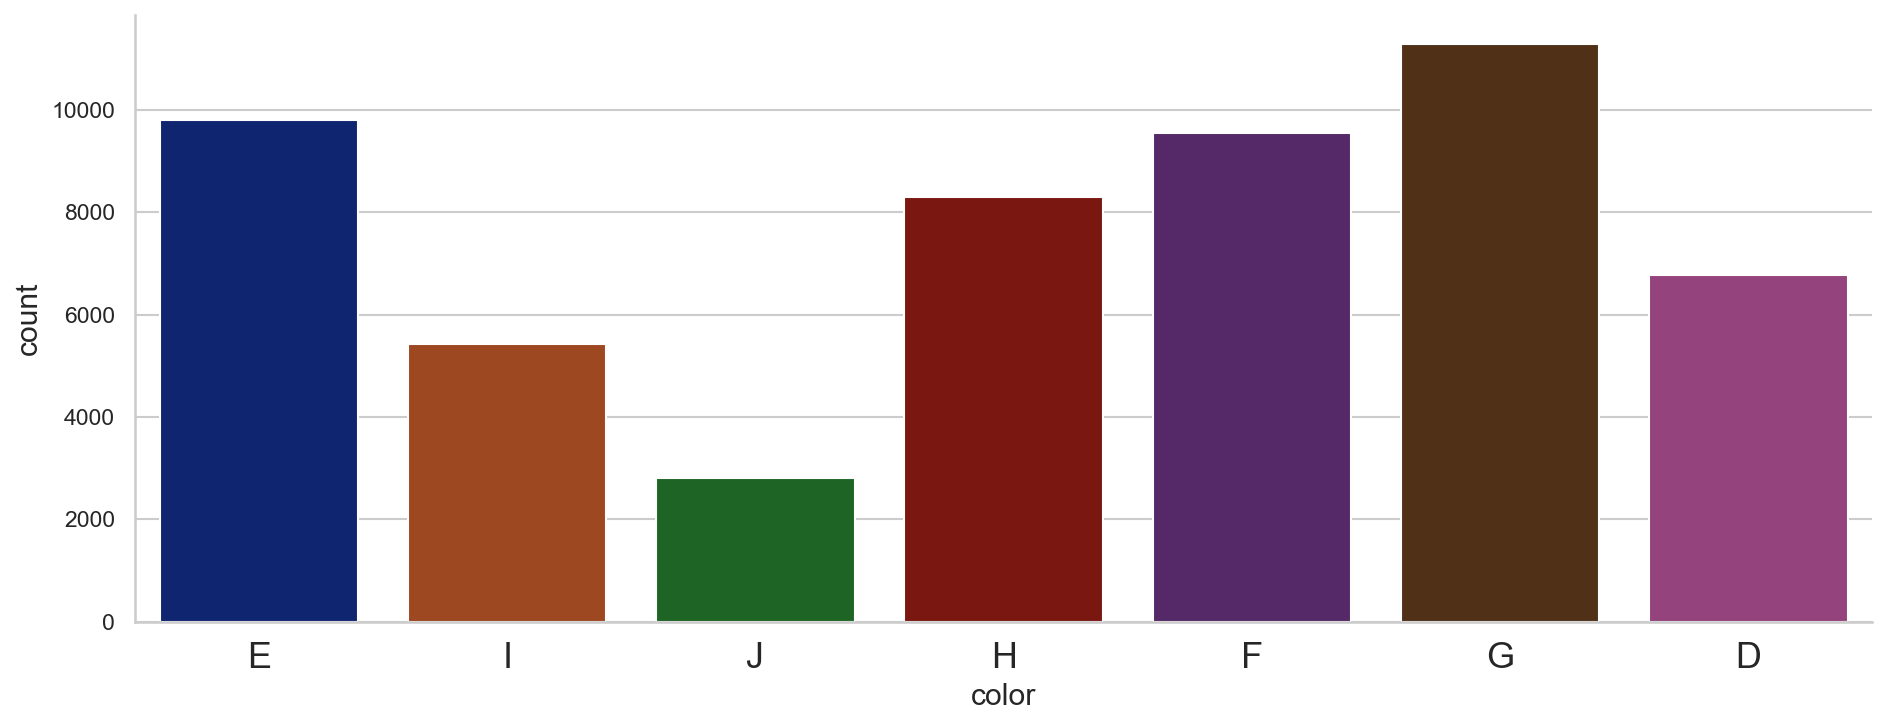

In [22]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 );

#### Color vs Price

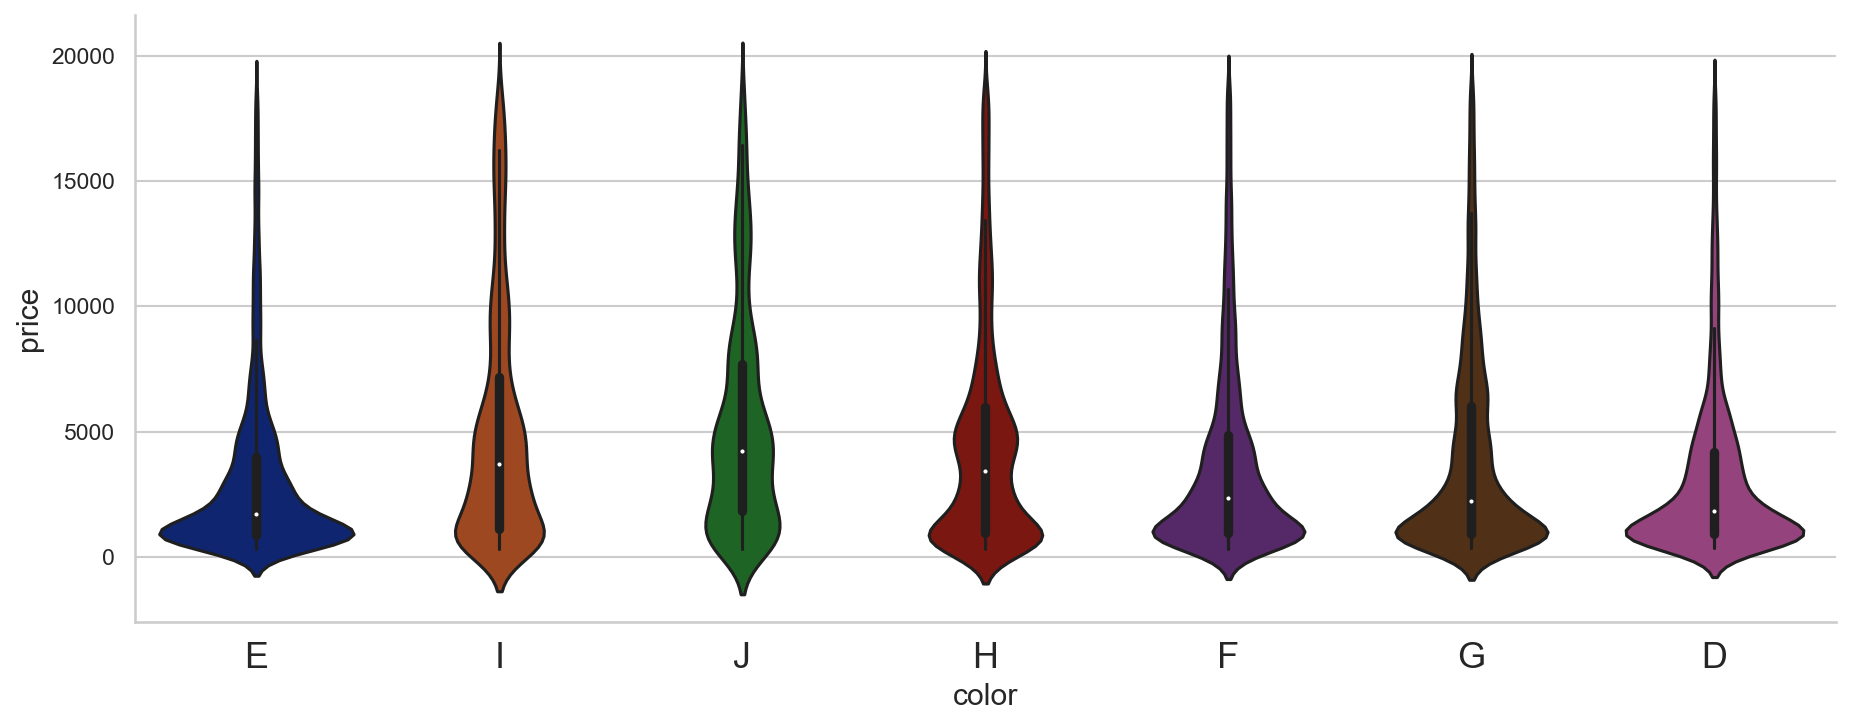

In [23]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5);

### 3.4) Clarity
* Diamond Clarity refers to the absence of the Inclusions and Blemishes.
* An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.
* Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.

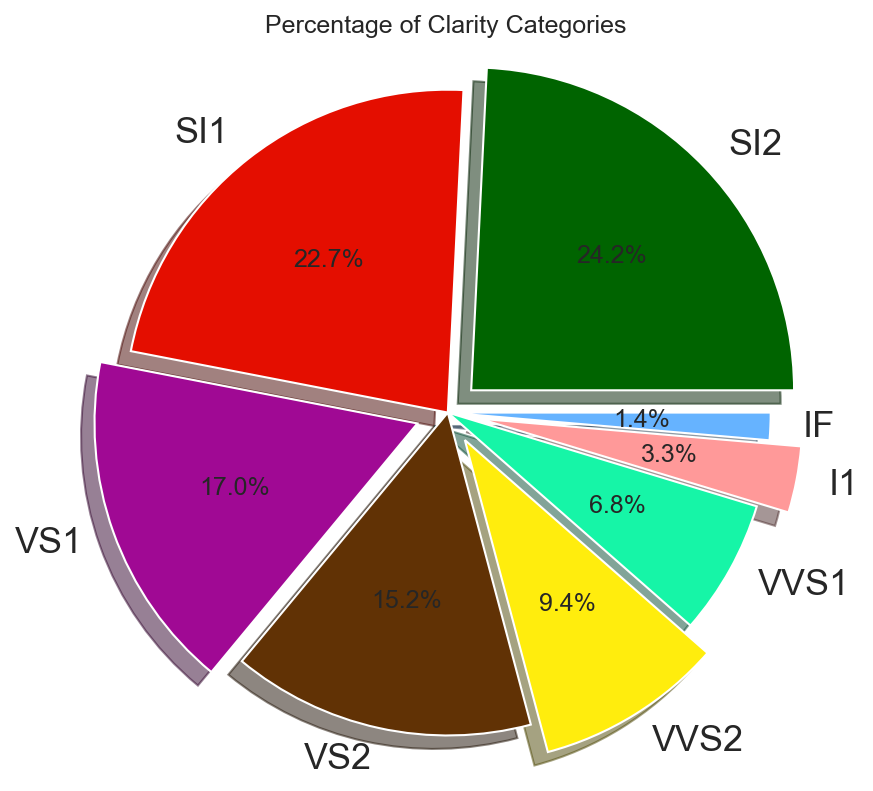

In [24]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

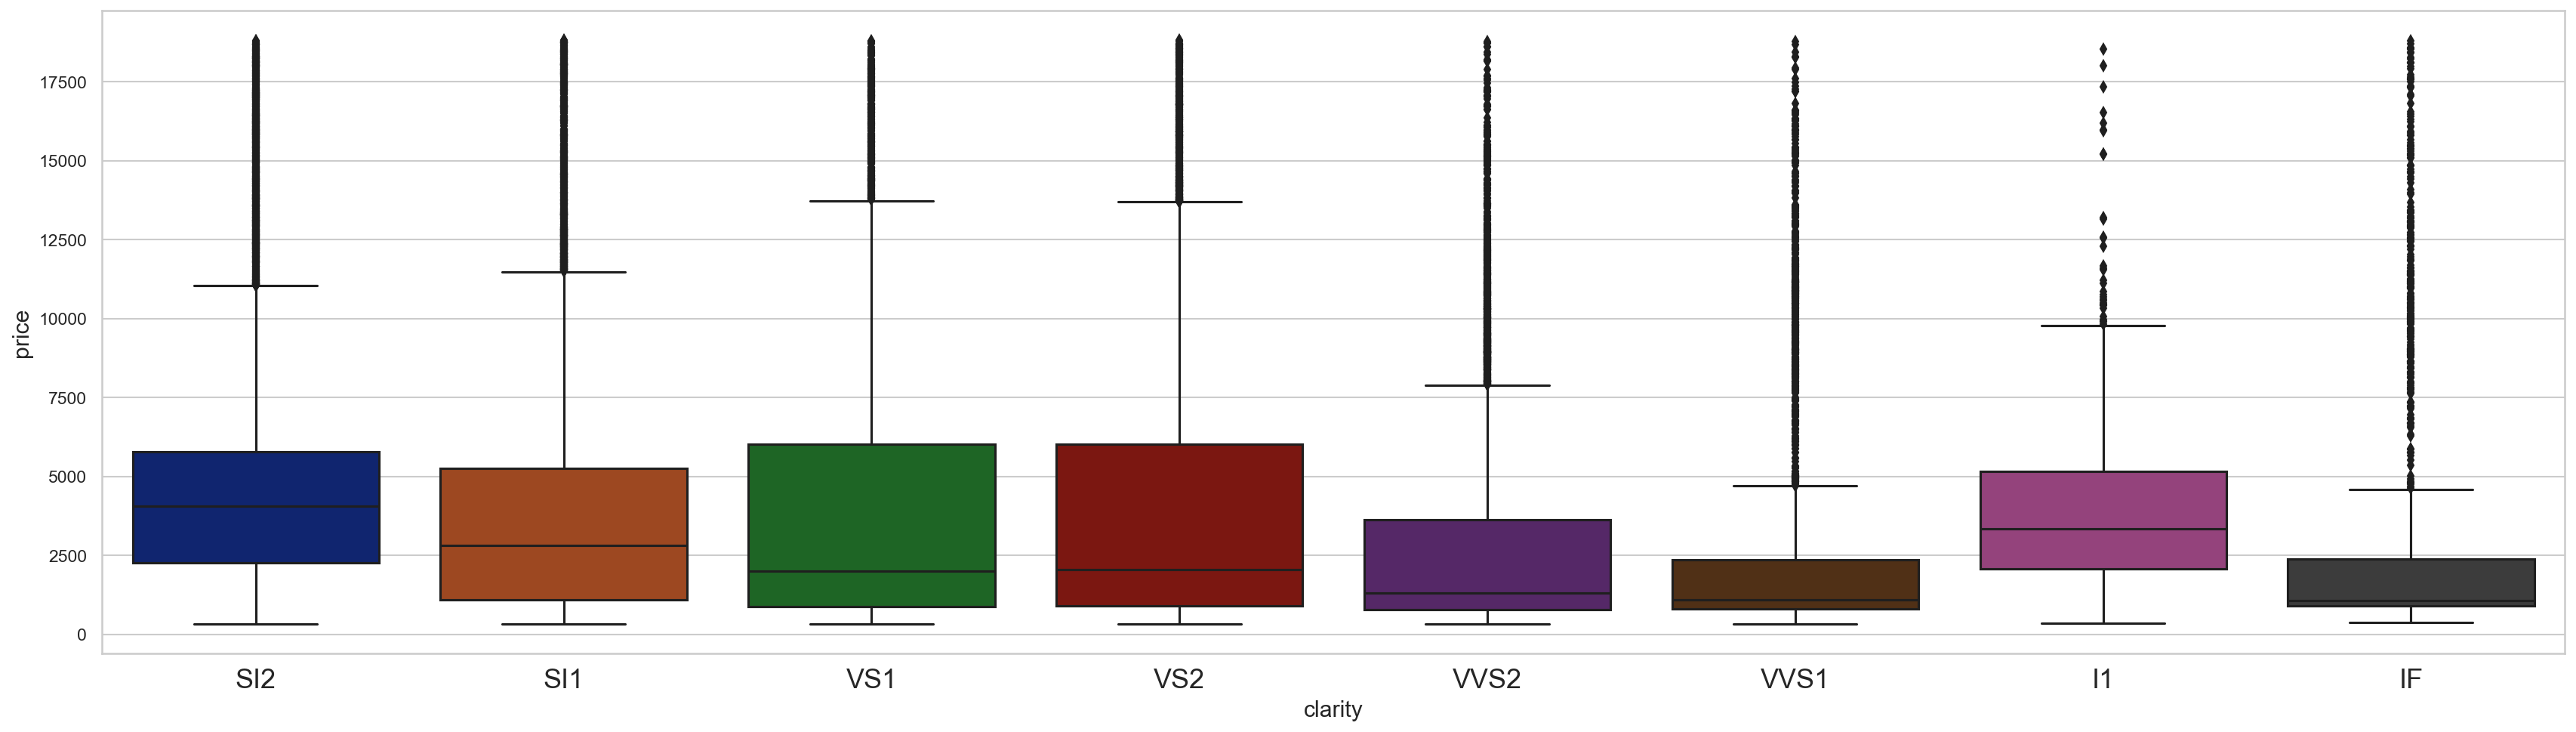

In [25]:
sns.boxplot(x='clarity', y='price', data=df );

### It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

### 3.5) Depth
* The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.
* If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

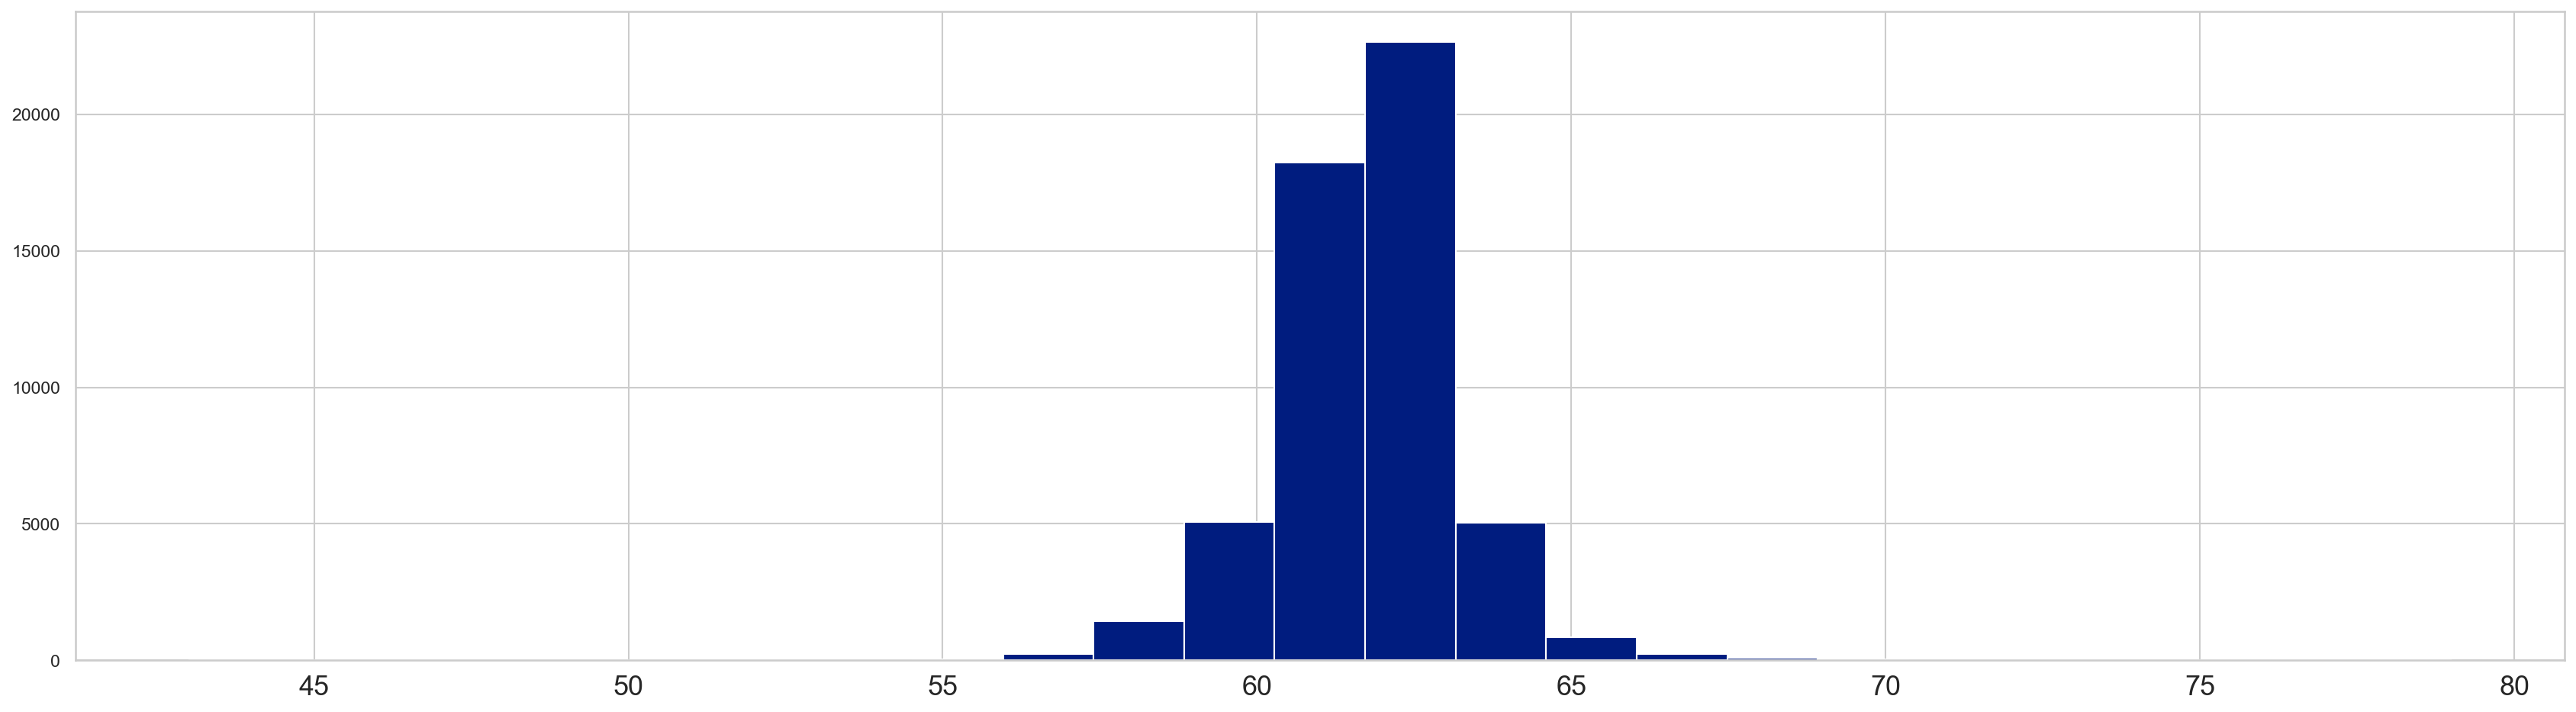

In [26]:
plt.hist('depth' , data=df , bins=25)

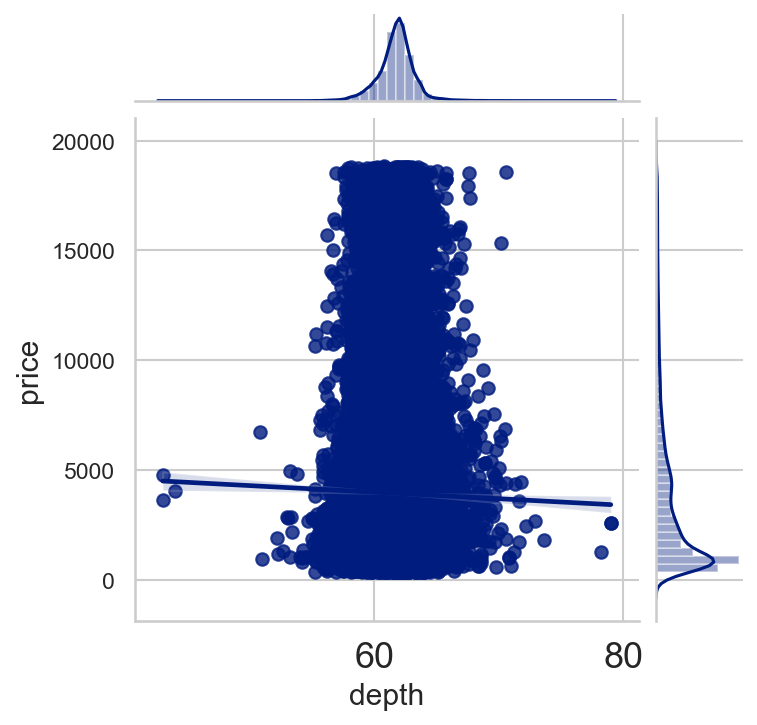

In [27]:
sns.jointplot(x='depth', y='price' , data=df , kind='regplot', size=5);

#### 3.6) Table
* Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.
* If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.

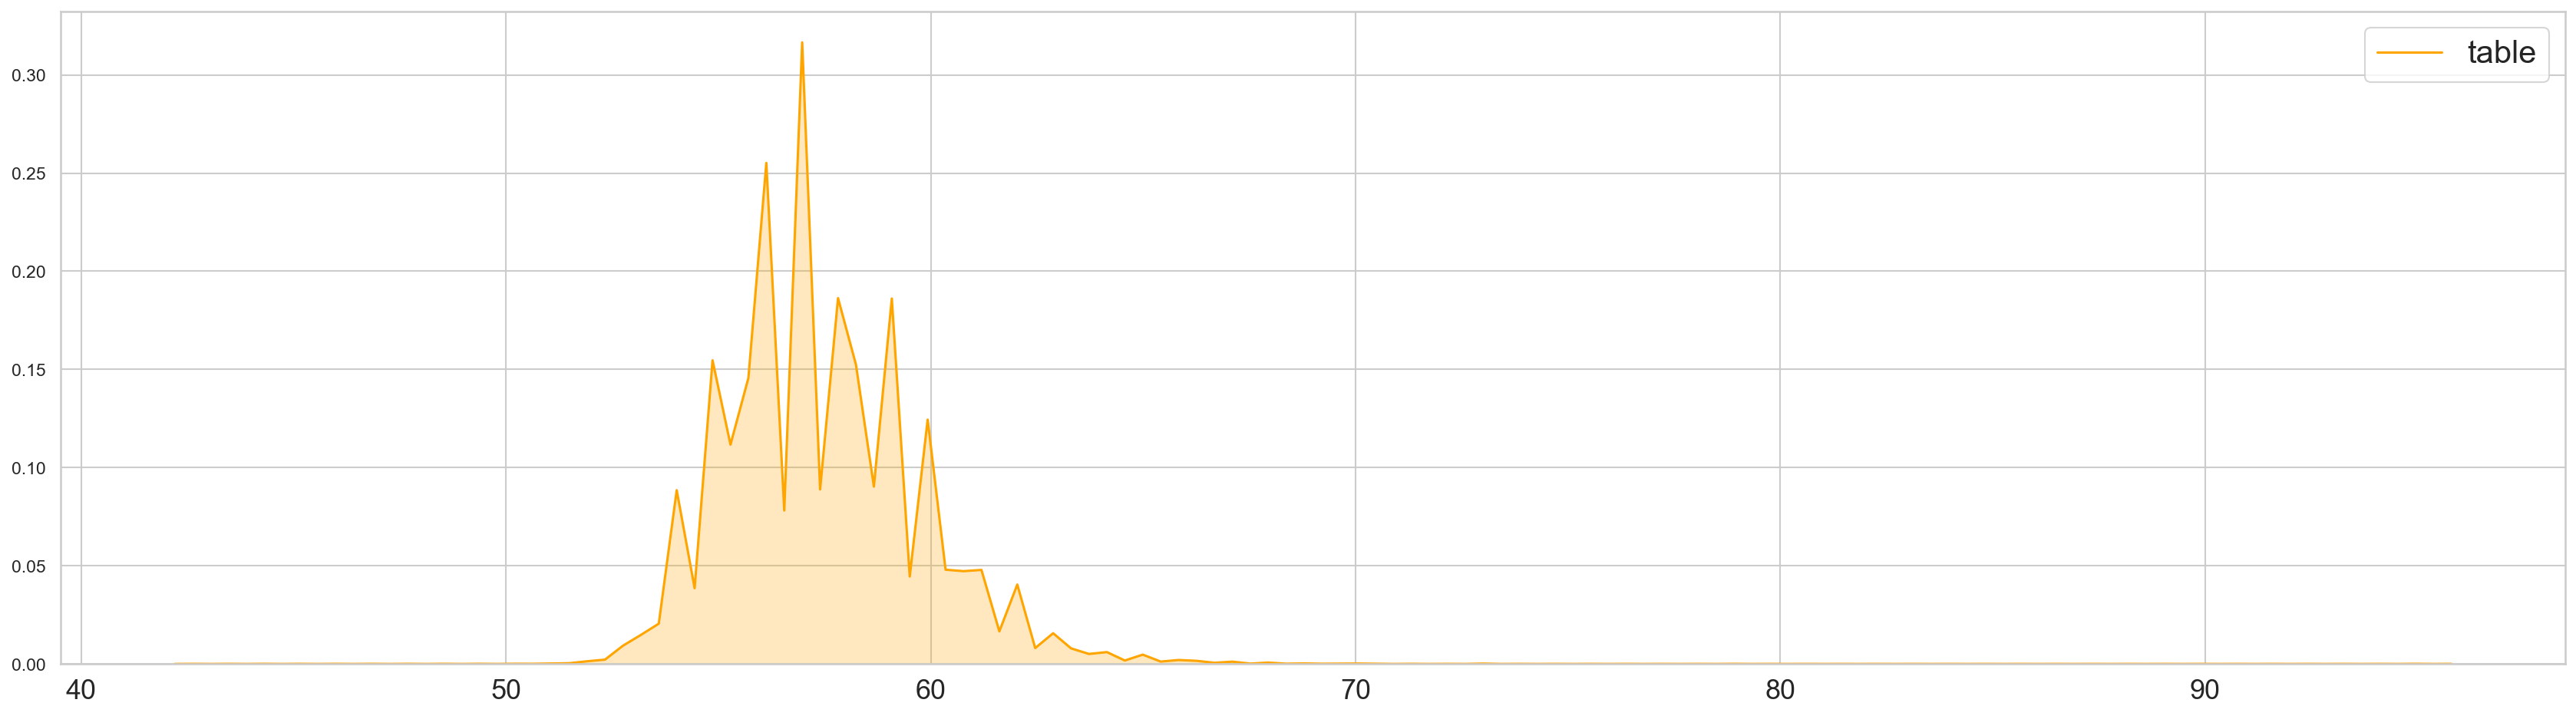

In [28]:
sns.kdeplot(df['table'] ,shade=True , color='orange');

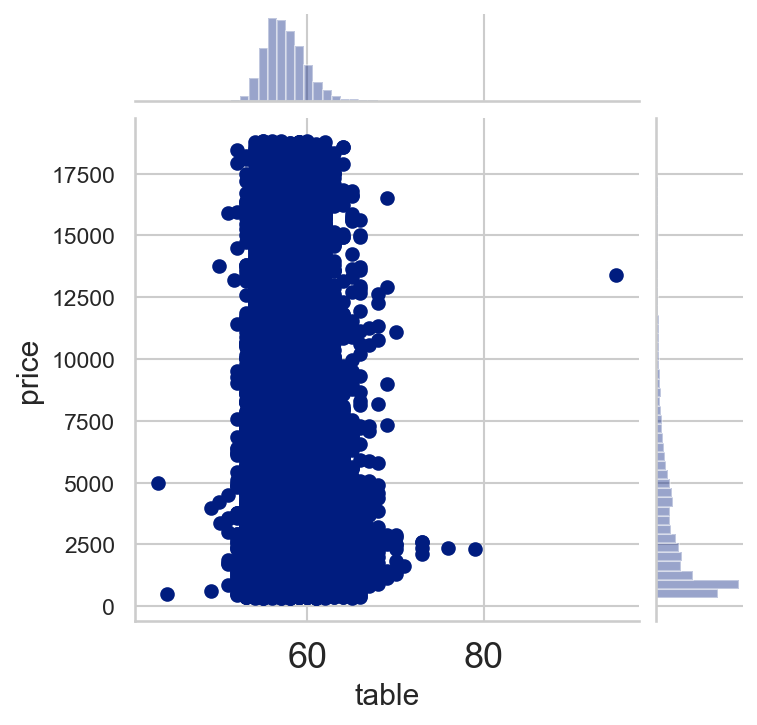

In [29]:
sns.jointplot(x='table', y='price', data=df , size=5);

### 3.7) Dimensions
* As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

(2.0, 10.0)

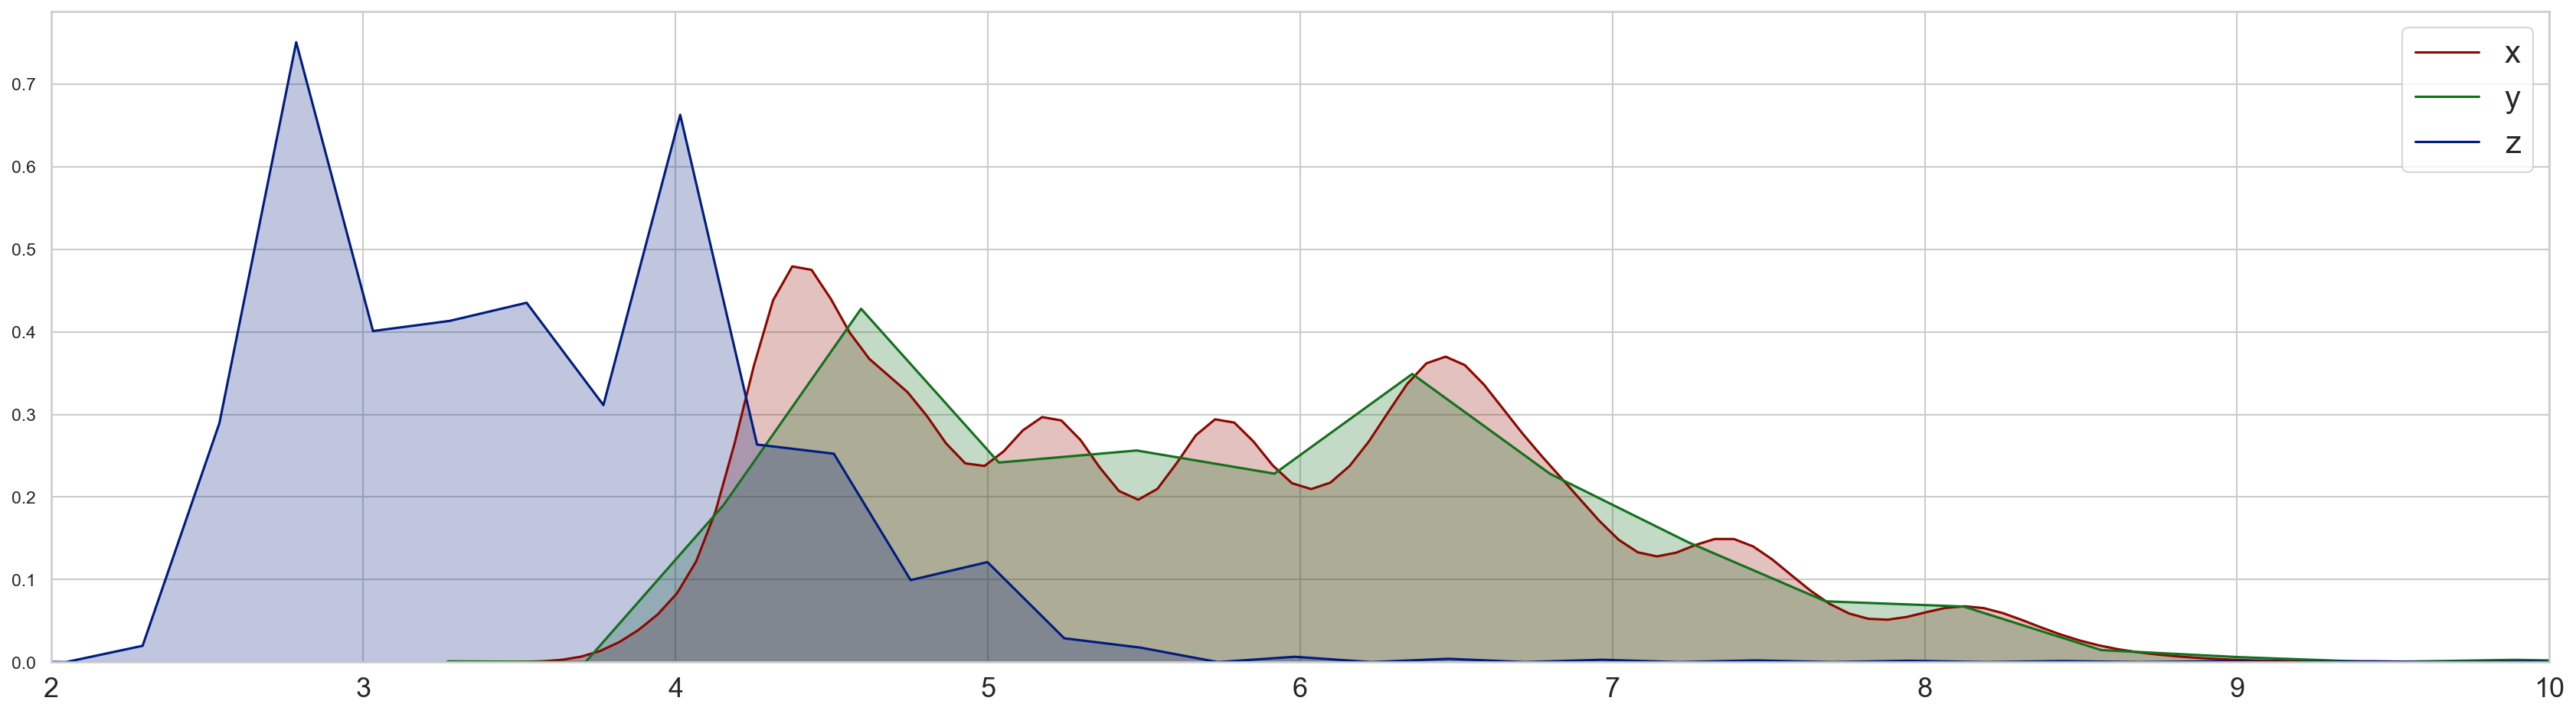

In [30]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

### We'll Create a New Feature based on the Dimensions in the Next Section called 'Volume' and Visualize how it affects the Price.

#### 4) Feature Engineering
##### 4.1) Create New Feature 'Volume'

In [31]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

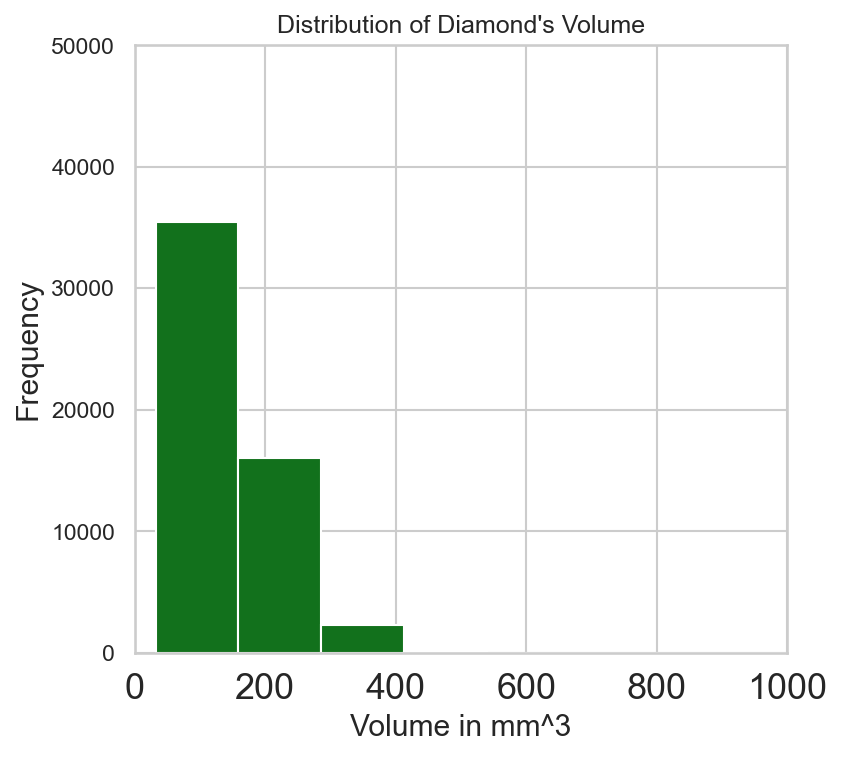

In [32]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

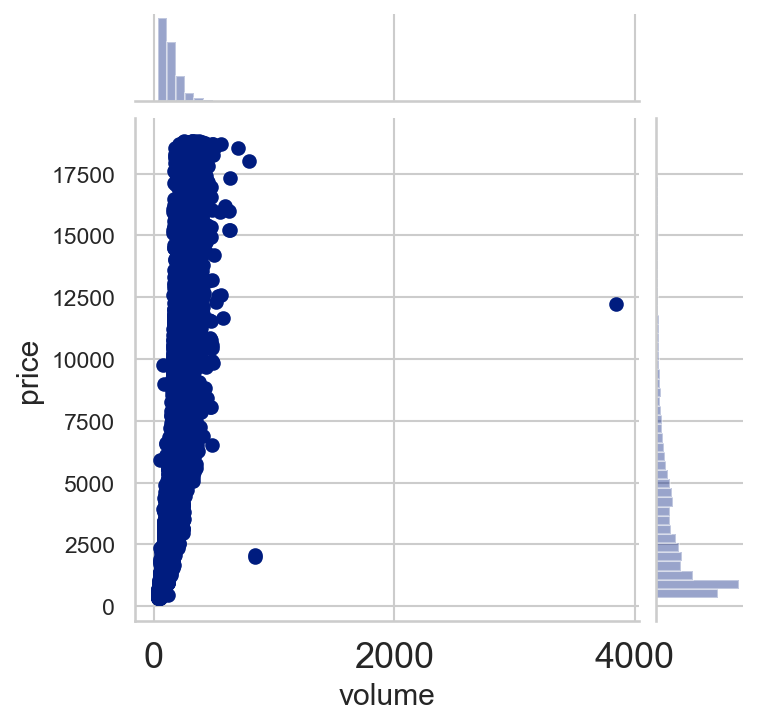

In [33]:
sns.jointplot(x='volume', y='price' , data=df, size=5)

##### It seems that there is Linear Relationship between Price and Volume (x * y * z).

## 4.2) Drop X, Y, Z

In [34]:
df.drop(['x','y','z'], axis=1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [35]:
# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

### 5) Feature Encoding
* Label the Categorical Features with digits to Distinguish.
* As we can't feed String data for Modelling.

In [36]:
# Modelling Helpers :
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [37]:

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

### 6) Feature Scaling
* Divide the Dataset into Train and Test, So that we can fit the Train for Modelling Algos and Predict on Test.
* Then Apply Feature Scaling although it's not neccessary in this case. But it surely helps.

In [38]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

#### Applying Feature Scaling ( StandardScaler )
#### You can also Apply MinMaxScaler.

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###  Modelling Algos


In [40]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

 ### Linear Regression

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [42]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE    : 1911398.80 
MAE    : 926.72 
RMSE   : 1382.53 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### 7.2) Lasso Regression

In [43]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8659
[0.84325995 0.86900907 0.86386374 0.86539938 0.86976969]

MSE    : 2162331.94 
MAE    : 909.60 
RMSE   : 1470.49 
R2     : 0.87 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


### 7.3) AdaBosst Regression

In [44]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.8861
[0.87557688 0.86972072 0.88332781 0.88901663 0.90336287]

MSE    : 1836448.77 
MAE    : 1049.17 
RMSE   : 1355.16 
R2     : 0.89 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.6s finished


### 7.4) Ridge Regression

In [45]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.7537
[0.74232856 0.75599775 0.74753493 0.75626    0.74960313]

MSE    : 3970442.17 
MAE    : 1346.18 
RMSE   : 1992.60 
R2     : 0.75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### 7.5) GradientBoosting Regression

In [46]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            2.97s
         2    12437807.7359            2.84s
         3    11113339.5845            2.55s
         4     9945244.2308            2.40s
         5     8973416.9156            2.39s
         6     8109014.7842            2.32s
         7     7387120.0500            2.30s
         8     6753937.9878            2.32s
         9     6197182.6819            2.30s
        10     5724689.0901            2.24s
        20     3200362.4597            1.79s
        30     2393542.3170            1.45s
        40     2102586.3335            1.22s
        50     1923964.9187            0.98s
        60     1790574.6006            0.84s
        70     1688380.2826            0.64s
        80     1609829.0076            0.42s
        90     1548089.0039            0.21s
       100     1499127.4566            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    13994442.1962            2.47s
         2    12429322.7982            1.96s
         3    11112606.0983            1.75s
         4     9944843.0686            1.63s
         5     8977395.9870            1.58s
         6     8111748.5741            1.55s
         7     7395490.7272            1.51s
         8     6765223.5285            1.49s
         9     6204866.4570            1.47s
        10     5734465.9748            1.44s
        20     3206145.1577            1.32s
        30     2394369.2846            1.10s
        40     2101114.6326            0.94s
        50     1921108.4005            0.78s
        60     1785959.4111            0.62s
        70     1683385.7302            0.46s
        80     1604163.5538            0.31s
        90     1542370.2912            0.15s
       100     1493476.7608            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            1.88s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


### 7.6) RandomForest Regression

In [47]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished



###### Random Forest ######
Score : 0.9822
[0.97932172 0.98057144 0.98166094 0.977441   0.98127417]

MSE    : 286859.46 
MAE    : 271.46 
RMSE   : 535.59 
R2     : 0.98 


### Tuning Parameters

In [48]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9822
R2     : 0.98 


### 7.7) KNeighbours Regression

In [49]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished



###### KNeighbours Regression ######
Score : 0.9590
[0.95429058 0.95856983 0.95504994 0.94931403 0.95517559]

MSE    : 660416.40 
MAE    : 424.98 
RMSE   : 812.66 
R2     : 0.96 


### Tuning Parameters

In [50]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9590
R2     : 0.96 


### 8) Visualizing R2-Score of Algorithms

In [51]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=True)

,Algorithms,R2-Scores
3,Ridge Regression,0.753705
1,Lasso Regression,0.865866
0,Linear Regression,0.881432
2,AdaBoost Regression,0.886081
4,GradientBoosting Regression,0.905833
6,KNeighbours Regression,0.959033
5,RandomForest Regression,0.982197


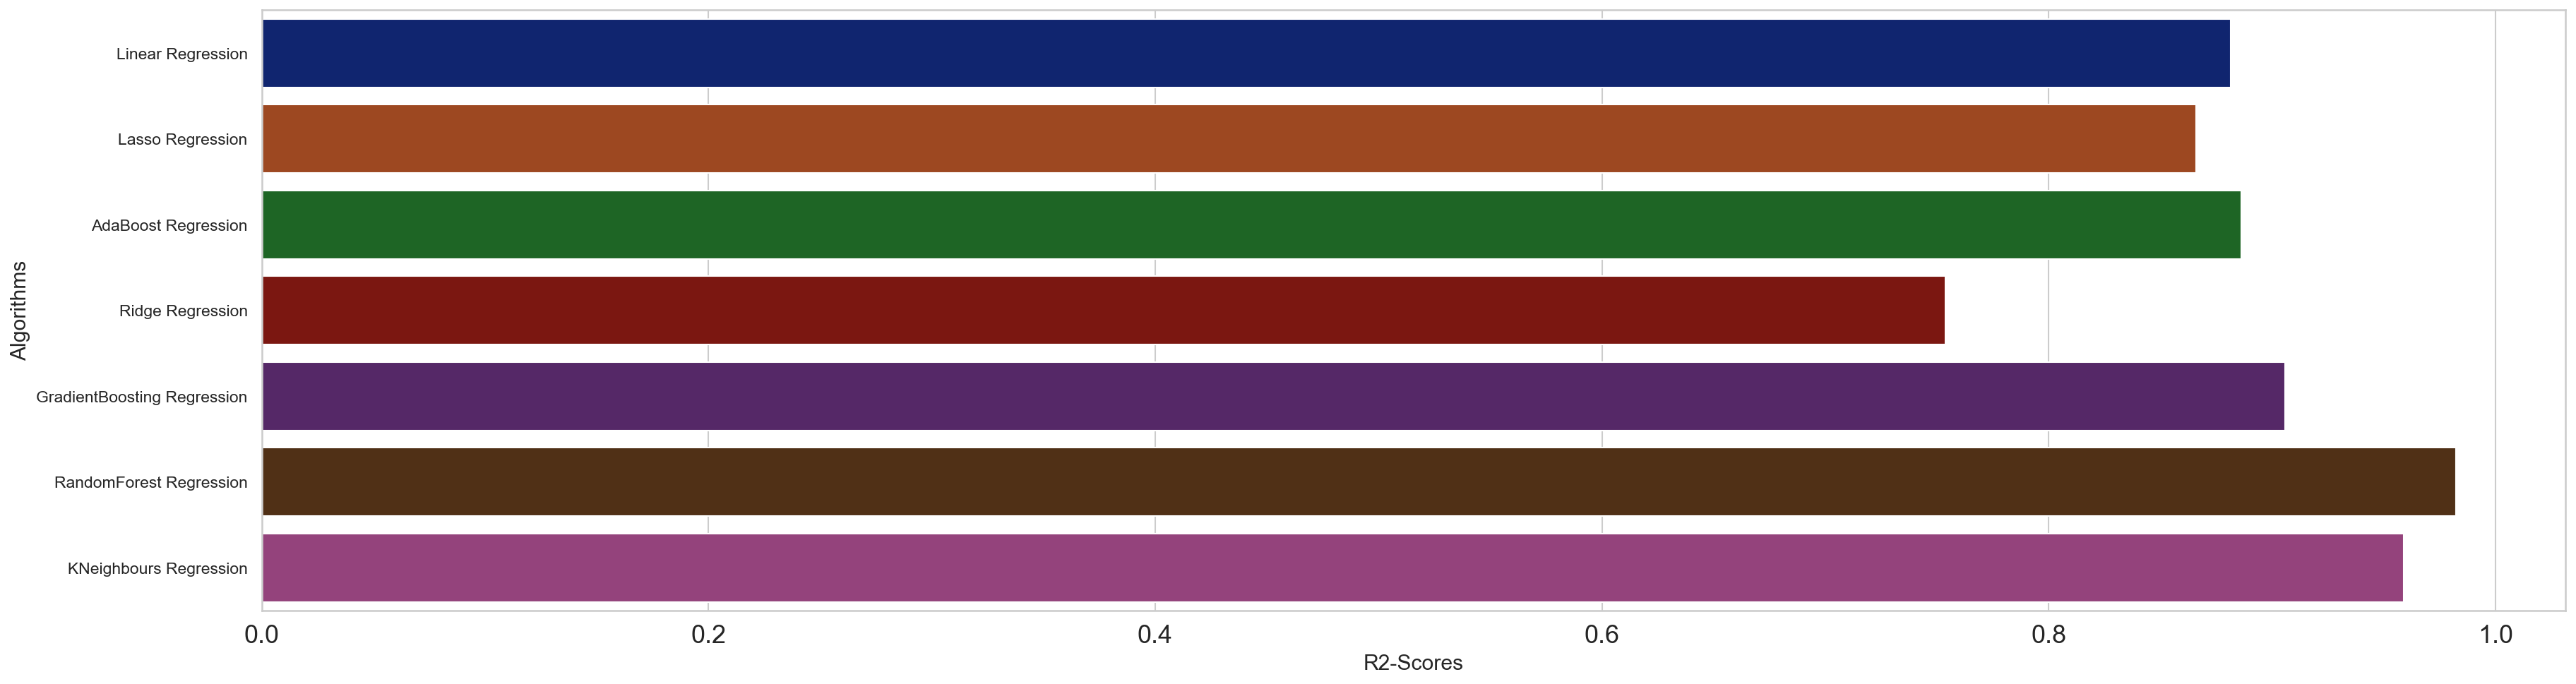

In [52]:
sns.barplot(x='R2-Scores', y='Algorithms', data=compare)


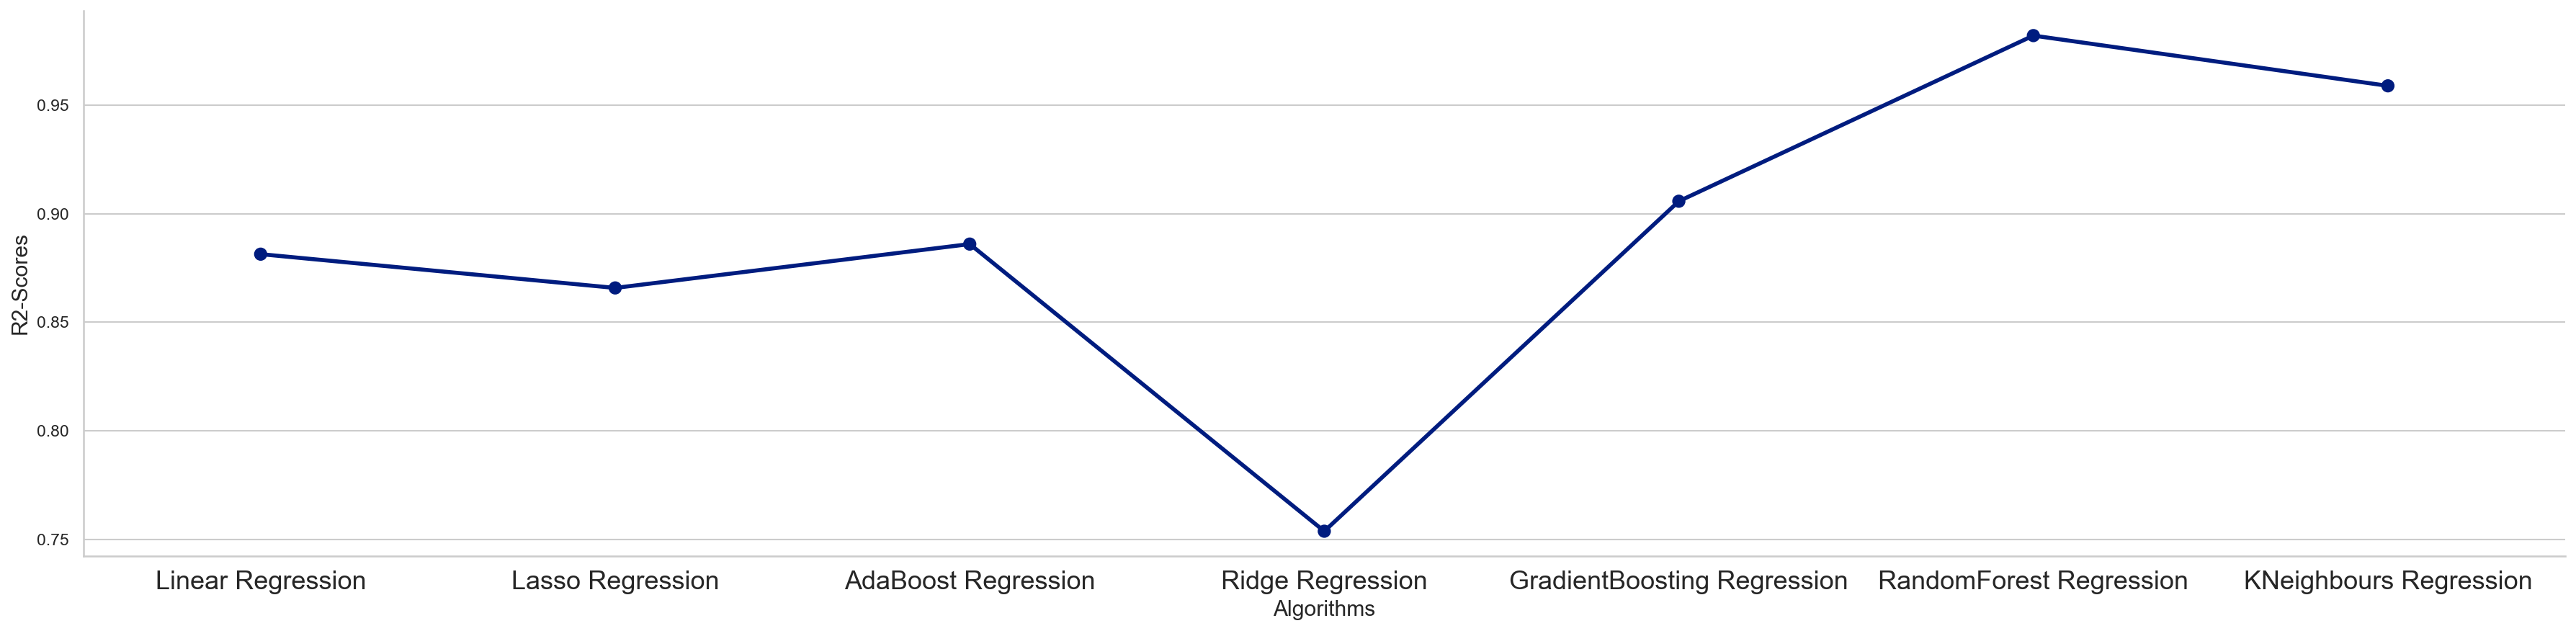

In [53]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

### Random Forest Regressor gives us the highest R2-Score [ 98% ] .